In [9]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 13350785102972368482
 xla_global_id: -1]

In [10]:
from __future__ import print_function
import keras
from keras.datasets import mnist 
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K

import matplotlib.pyplot as plt

In [11]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

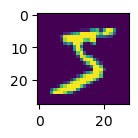

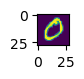

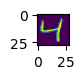

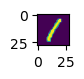

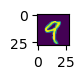

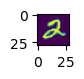

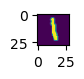

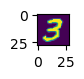

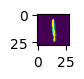

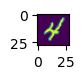

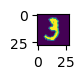

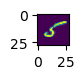

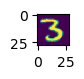

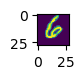

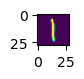

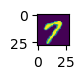

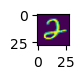

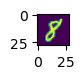

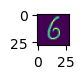

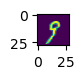

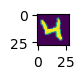

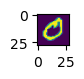

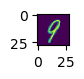

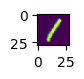

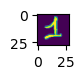

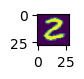

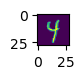

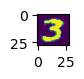

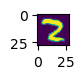

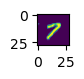

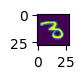

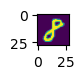

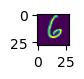

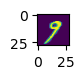

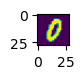

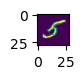

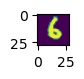

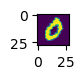

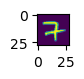

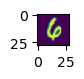

In [12]:
plt.figure(figsize = (14,14))
x, y = 10,4
for i in range(40):
    plt.subplot(x, y, i+1)
    plt.imshow(X_train[i])
    plt.show()

In [13]:
batch_size = 128
num_classes = 10
epochs = 12
img_rows, img_cols = 28,28
if K.image_data_format() == 'chanels_first':
    X_train = X_train_reshape(X_train.reshape[0], 1, img_rows)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)    

In [14]:
Y_train = keras.utils.to_categorical(Y_train, num_classes )
Y_test = keras.utils.to_categorical(Y_test, num_classes )

In [15]:
model = Sequential()

In [16]:
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

 
model.add(Conv2D(64, (3, 3), activation='relu'))


model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Dropout(0.25))


model.add(Flatten())


model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))


model.add(Dense(num_classes, activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [18]:
model.compile(loss = keras.losses.categorical_crossentropy,
             optimizer = keras.optimizers.Adadelta(),
              metrics = ['accuracy'])


In [19]:

model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/12
469/469 [==============================] - 38s 81ms/step - loss: 24.9763 - accuracy: 0.1363 - val_loss: 3.7672 - val_accuracy: 0.4130
Epoch 2/12
469/469 [==============================] - 39s 83ms/step - loss: 10.3679 - accuracy: 0.2602 - val_loss: 1.6243 - val_accuracy: 0.5875
Epoch 3/12
469/469 [==============================] - 39s 83ms/step - loss: 5.4741 - accuracy: 0.3245 - val_loss: 1.2399 - val_accuracy: 0.5973
Epoch 4/12
469/469 [==============================] - 39s 83ms/step - loss: 3.4138 - accuracy: 0.3461 - val_loss: 1.4016 - val_accuracy: 0.5343
Epoch 5/12
469/469 [==============================] - 39s 84ms/step - loss: 2.5642 - accuracy: 0.3460 - val_loss: 1.5504 - val_accuracy: 0.4924
Epoch 6/12
469/469 [==============================] - 39s 84ms/step - loss: 2.1989 - accuracy: 0.3518 - val_loss: 1.6042 - val_accuracy: 0.4804
Epoch 7/12
469/469 [==============================] - 40s 85ms/step - loss: 2.0293 - accuracy: 0.3572 - val_loss: 1.5722 - val_accurac

In [20]:
model.save('save_models/mnist_model.h5')


In [21]:
score = model.evaluate(X_test, Y_test, verbose = 0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

Test Loss: 1.1965274810791016
Test Accuracy: 0.6653000116348267


In [22]:
# Rastgele Değer İçin Test İşlemi

test_image = X_test[128]
Y_test[128]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

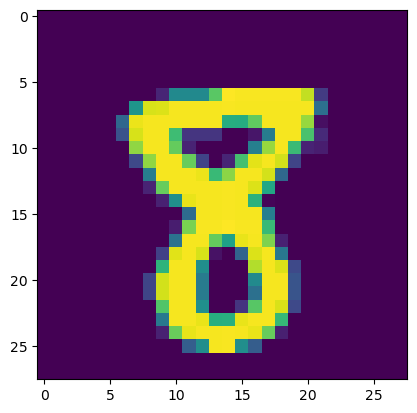

In [23]:
plt.imshow(test_image.reshape(28,28))

In [24]:
test_data = X_test[128].reshape(1,28,28,1)
pre = model.predict(test_data,batch_size = 1)

1/1 [==============================] - 0s 88ms/step


In [25]:
pred_probs = model.predict(test_data)
pred_class = pred_probs.argmax(axis=-1)
print(pred_class, pred_probs)

1/1 [==============================] - 0s 55ms/step
[9] [[0.00579112 0.04599887 0.08397295 0.00807128 0.2315404  0.02706239
  0.02506339 0.03366029 0.24435224 0.29448712]]
